In [7]:
from matplotlib import rcParams
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
from DataGenerator import generateOneClusterData
from Settings import (DEFAULT_NUMBER_OF_FEATURES,
                        DEFAULT_NUMBER_OF_RECORDS_PER_CLASS,
                        DEFAULT_FEATURE_MEAN_RANGE,
                        DEFAULT_RANDOM_NUMBER_SEED)

data = generateOneClusterData(DEFAULT_NUMBER_OF_FEATURES,
                            DEFAULT_NUMBER_OF_RECORDS_PER_CLASS,
                            DEFAULT_FEATURE_MEAN_RANGE, 
                            DEFAULT_RANDOM_NUMBER_SEED)


rcParams['figure.figsize'] = (6.0, 6.0)
from gap_statistic import OptimalK
optimalK = OptimalK(parallel_backend='joblib')

cluster_point_size = 3

perplexity_range = [30]
cluster_arr = range(1,5)

data_uniform_pertubed = np.delete(data,20,axis=0)

In [8]:
def tsne(data, n_comp, perplexity, plot = False):
        tsne_obj = TSNE(n_components=n_comp, perplexity=perplexity)
        X_embedded = tsne_obj.fit_transform(data)
        X_embedded.shape
        data.shape
        
        if plot:
            plt.scatter(X_embedded[:,0], X_embedded[:,1], s=cluster_point_size)
            optK = optimalK(X_embedded, cluster_array=cluster_arr)
            plt.title("Perplexity: {}, Optimal K: {}, Kullback-Leibler Divergence: {}".format(p, optK, tsne_obj.kl_divergence_))
            plt.show()
        return tsne_obj.kl_divergence_
    
def generate_dataset(seed=0):
    return generateOneClusterData(DEFAULT_NUMBER_OF_FEATURES,
                            DEFAULT_NUMBER_OF_RECORDS_PER_CLASS,
                            DEFAULT_FEATURE_MEAN_RANGE, 
                            seed)

### Pertubations

## t-SNE (Gaussian)

In [10]:
nr_datasets = 10
nr_pertubations = 10
kls = np.zeros(nr_datasets)
perplexity = 30 

nr_components = 3

kl_normal = np.zeros(nr_components) 


mean_kl_removal_diff = np.zeros([nr_components, nr_datasets])
std_kl_removal_diff = np.zeros([nr_components, nr_datasets])

mean_kl_scaling_diff = np.zeros([nr_components, nr_datasets])
std_kl_scaling_diff = np.zeros([nr_components, nr_datasets])


for iNrComponents in range(nr_components):
    
    print("======================== # Components {} of {} ========================".format(iNrComponents+1, nr_components))
    
    for iDataset in range(nr_datasets):
        print("======================== Dataset {} of {} ========================".format(iDataset+1, nr_datasets))
        data = generate_dataset(iDataset)

        kls = np.zeros(nr_pertubations) 
        removal_kls = np.zeros(nr_pertubations)
        scaling_kls = np.zeros(nr_pertubations)

        kl_normal[iNrComponents] = tsne(data, iNrComponents+1, perplexity)

        # Random data point removal pertubation
        for j in range(nr_pertubations):
            print("Removal pertubation {} of {}".format(j+1,nr_pertubations))
            data_removal = np.delete(data,random.randint(1, len(data)-1),axis=0)
            
            removal_kls[j] = kl_normal[iNrComponents] - tsne(data_removal, iNrComponents+1, perplexity)

        # Random data point scaling pertubation
        for j in range(nr_pertubations):
            print("Scaling pertubation {} of {}".format(j+1,nr_pertubations))
            data_rescaled = np.copy(data)

            # Scale 20 %
            random_dp_idx = random.randint(1, len(data)-1)
            random_dp = data_rescaled[random_dp_idx, :] 
            data_rescaled[random_dp_idx, :] = random_dp*1.20
            scaling_kls[j] = kl_normal[iNrComponents] - tsne(data_rescaled, iNrComponents+1, perplexity)


        mean_kl_removal_diff[iNrComponents, iDataset] = np.mean(removal_kls)
        std_kl_removal_diff[iNrComponents, iDataset] =  np.std(removal_kls)
        
        mean_kl_scaling_diff[iNrComponents, iDataset] = np.mean(scaling_kls)
        std_kl_scaling_diff[iNrComponents, iDataset] =  np.std(scaling_kls)
            
            
        print("No pertubation - Avg KL Div: {}, KL Div STD: {}".format(np.mean(kls), np.std(kls)))
        print("Random Removal - Avg KL Div: {}, KL Div STD: {}".format(np.mean(removal_kls), np.std(removal_kls)))
        print("Random Scaling - Avg KL Div: {}, KL Div STD: {}".format(np.mean(scaling_kls), np.std(scaling_kls)))
        print("\n")


======================== # Components 1 of 3 ========================
======================== Dataset 1 of 10 ========================
Removal pertubation 1 of 10
Removal pertubation 2 of 10
Removal pertubation 3 of 10
Removal pertubation 4 of 10
Removal pertubation 5 of 10
Removal pertubation 6 of 10
Removal pertubation 7 of 10
Removal pertubation 8 of 10
Removal pertubation 9 of 10
Removal pertubation 10 of 10
Scaling pertubation 1 of 10
Scaling pertubation 2 of 10
Scaling pertubation 3 of 10
Scaling pertubation 4 of 10
Scaling pertubation 5 of 10
Scaling pertubation 6 of 10
Scaling pertubation 7 of 10
Scaling pertubation 8 of 10
Scaling pertubation 9 of 10
Scaling pertubation 10 of 10
No pertubation - Avg KL Div: 0.0, KL Div STD: 0.0
Random Removal - Avg KL Div: 0.03911682367324829, KL Div STD: 0.07845420988873868
Random Scaling - Avg KL Div: -0.07488479614257812, KL Div STD: 0.12060802565345712


======================== Dataset 2 of 10 ========================
Removal pertubation

Scaling pertubation 8 of 10
Scaling pertubation 9 of 10
Scaling pertubation 10 of 10
No pertubation - Avg KL Div: 0.0, KL Div STD: 0.0
Random Removal - Avg KL Div: 0.011110568046569824, KL Div STD: 0.0804132415798309
Random Scaling - Avg KL Div: -0.03787221908569336, KL Div STD: 0.0921165805354872


======================== # Components 2 of 3 ========================
======================== Dataset 1 of 10 ========================
Removal pertubation 1 of 10
Removal pertubation 2 of 10
Removal pertubation 3 of 10
Removal pertubation 4 of 10
Removal pertubation 5 of 10
Removal pertubation 6 of 10
Removal pertubation 7 of 10
Removal pertubation 8 of 10
Removal pertubation 9 of 10
Removal pertubation 10 of 10
Scaling pertubation 1 of 10
Scaling pertubation 2 of 10
Scaling pertubation 3 of 10
Scaling pertubation 4 of 10
Scaling pertubation 5 of 10
Scaling pertubation 6 of 10
Scaling pertubation 7 of 10
Scaling pertubation 8 of 10
Scaling pertubation 9 of 10
Scaling pertubation 10 of 10
N

Removal pertubation 5 of 10
Removal pertubation 6 of 10
Removal pertubation 7 of 10
Removal pertubation 8 of 10
Removal pertubation 9 of 10
Removal pertubation 10 of 10
Scaling pertubation 1 of 10
Scaling pertubation 2 of 10
Scaling pertubation 3 of 10
Scaling pertubation 4 of 10
Scaling pertubation 5 of 10
Scaling pertubation 6 of 10
Scaling pertubation 7 of 10
Scaling pertubation 8 of 10
Scaling pertubation 9 of 10
Scaling pertubation 10 of 10
No pertubation - Avg KL Div: 0.0, KL Div STD: 0.0
Random Removal - Avg KL Div: -0.004954677820205688, KL Div STD: 0.006043806561275402
Random Scaling - Avg KL Div: -0.0031332612037658692, KL Div STD: 0.006717283067971476


======================== # Components 3 of 3 ========================
======================== Dataset 1 of 10 ========================
Removal pertubation 1 of 10
Removal pertubation 2 of 10
Removal pertubation 3 of 10
Removal pertubation 4 of 10
Removal pertubation 5 of 10
Removal pertubation 6 of 10
Removal pertubation 7 o

Removal pertubation 1 of 10
Removal pertubation 2 of 10
Removal pertubation 3 of 10
Removal pertubation 4 of 10
Removal pertubation 5 of 10
Removal pertubation 6 of 10
Removal pertubation 7 of 10
Removal pertubation 8 of 10
Removal pertubation 9 of 10
Removal pertubation 10 of 10
Scaling pertubation 1 of 10
Scaling pertubation 2 of 10
Scaling pertubation 3 of 10
Scaling pertubation 4 of 10
Scaling pertubation 5 of 10
Scaling pertubation 6 of 10
Scaling pertubation 7 of 10
Scaling pertubation 8 of 10
Scaling pertubation 9 of 10
Scaling pertubation 10 of 10
No pertubation - Avg KL Div: 0.0, KL Div STD: 0.0
Random Removal - Avg KL Div: -0.1408890962600708, KL Div STD: 0.07982117229795807
Random Scaling - Avg KL Div: -0.07178969383239746, KL Div STD: 0.08772556917066922




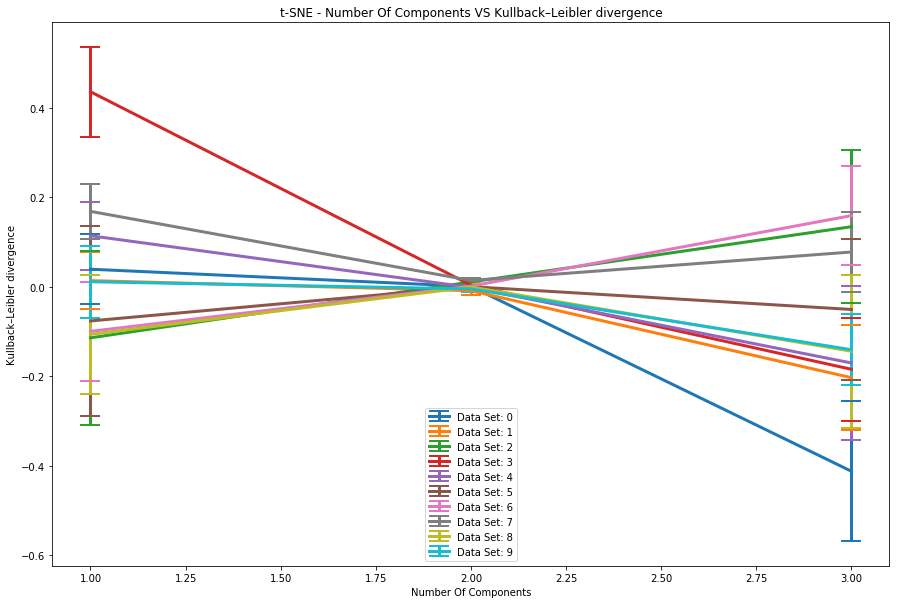

In [19]:
plt.figure(figsize=(15, 10))
for i in range(nr_datasets):
    plt.errorbar(range(1, nr_components+1), mean_kl_removal_diff[:,i], yerr=std_kl_removal_diff[:,i],
                capthick=2, capsize=10, linewidth=3, label="Data Set: {}".format(i))  

    
plt.title("t-SNE - Number Of Components VS Kullback–Leibler divergence")
plt.xlabel("Number Of Components")
plt.ylabel("Kullback–Leibler divergence")
plt.legend()

plt.show()